# Observations and Insights 

##### 1. The total number of mice is distributed evenly across the 10 drug regimens (about 25 mice per group), and an even distribution between male and female mice (49.8% female, 50.2% male)
##### 2. A comparison between the four regimens of interest (Capomulin, Ramicane, Infubinol, Ceftamin) reveals that Capomulin and Remicare seem to be associated with a decrease in tumor volume over time (


In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
print(mouse_metadata.info())
print(study_results.info())
# Combine the data into a single dataset
df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB
None


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df[df.duplicated(['Mouse ID', 'Timepoint'])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
df[df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])


In [6]:
# Checking the number of mice in the clean DataFrame.
df['Mouse ID'].nunique()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
meanTV = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
medianTV = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
varTV = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdTV = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEMTV = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()



# This method is the most straighforward, creating multiple series and putting them all together at the end.
pd.DataFrame({
    "Tumor Volume Mean" : meanTV,
    "Tumor Volume Median" : medianTV,
    "Tumor Volume Variance" : varTV,
    "Tumor Volume Standard Dev" : stdTV,
    "Tumor Volume SEM" : SEMTV
})



,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

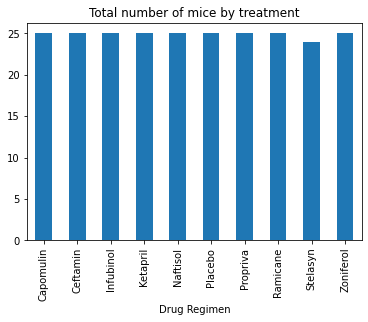

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#df.groupby('Drug Regimen')['Mouse ID'].count()
tot_mice_per_treatment = df.groupby('Drug Regimen')['Mouse ID'].nunique()
tot_mice_per_treatment.plot.bar(title="Total number of mice by treatment")
plt.show()

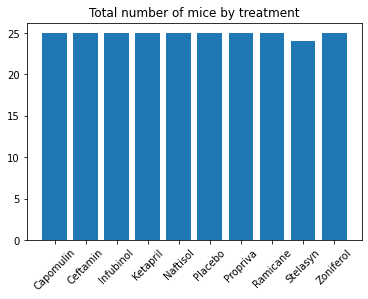

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
tot_mice_per_treatment = df.groupby('Drug Regimen')['Mouse ID'].nunique()
plt.bar(tot_mice_per_treatment.index, tot_mice_per_treatment)
plt.title("Total number of mice by treatment")
plt.xticks(rotation=45)
plt.show()

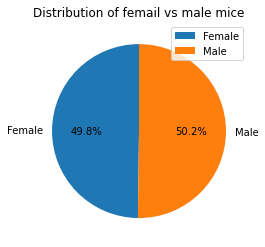

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df.groupby('Sex')['Mouse ID'].nunique().plot.pie(startangle=90, autopct="%1.1f%%")
plt.title("Distribution of femail vs male mice")
plt.ylabel(None)
plt.legend()
plt.show()

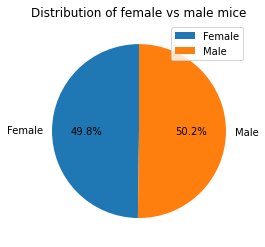

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex = df.groupby('Sex')['Mouse ID'].nunique()
plt.pie(mouse_sex, labels = mouse_sex.index, startangle=90, autopct="%1.1f%%")
plt.title("Distribution of female vs male mice")
plt.legend()
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumour volume of each mouse across four of the most
#  promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. 

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = df[df['Drug Regimen'].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])].groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_tumor_volume = pd.merge(last_timepoint, df, on=["Mouse ID","Timepoint"], how = "left")
last_timepoint_tumor_volume[['Mouse ID', 'Tumor Volume (mm3)']]

,Mouse ID,Tumor Volume (mm3)
0,a203,67.973419
1,a251,65.525743
2,a275,62.999356
3,a411,38.407618
4,a444,43.047543
...,...,...
95,y769,68.594745
96,y793,31.896238
97,y865,64.729837
98,z578,30.638696


In [14]:
last_timepoint_tumor_volume.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [15]:
# Calculate the quartiles and IQR and quantitatively determine if
#  there are any potential outliers across all four treatment regimens.
quartiles = last_timepoint_tumor_volume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Vol is: {lowerq}")
print(f"The upper quartile of Tumor Vol is: {upperq}")
print(f"The interquartile range of Tumor Vol is: {iqr}")
print(f"The median of Tumor Vol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

min_tumor_volume = last_timepoint_tumor_volume['Tumor Volume (mm3)'].min()
max_tumor_volume = last_timepoint_tumor_volume['Tumor Volume (mm3)'].max()

print(min_tumor_volume)
print(max_tumor_volume)
# no potential outliers identified

The lower quartile of Tumor Vol is: 37.1877438025
The upper quartile of Tumor Vol is: 59.930261755
The interquartile range of Tumor Vol is: 22.742517952499995
The median of Tumor Vol is: 45.0 
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.
22.05012627
72.2267309


In [16]:
# creating 4 lists for the four treatment regimens of interest
Capomulin =[]
Ramicane =[]
Infubinol =[]
Ceftamin =[]

# find each tumor volume and append to appropriate regime list
for i,r in last_timepoint_tumor_volume.iterrows():
    if r['Drug Regimen'] == "Capomulin":
        Capomulin.append(r['Tumor Volume (mm3)'])
    elif r['Drug Regimen'] == "Ramicane":
        Ramicane.append(r['Tumor Volume (mm3)'])
    elif r['Drug Regimen'] == "Infubinol":
        Infubinol.append(r['Tumor Volume (mm3)'])
    else:
        Ceftamin.append(r['Tumor Volume (mm3)'])

# create dictionary of four lists
my_dict = {
    'Capomulin' : Capomulin,
    'Ramicane' : Ramicane,
    'Infubinol' : Infubinol,
    'Ceftamin' : Ceftamin
}

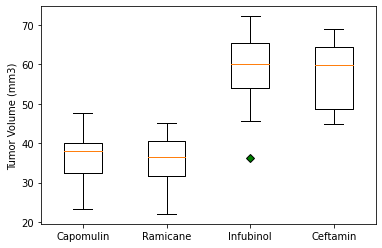

In [17]:
# Generate a box and whisker plot of the final tumour volume for all four treatment regimens 
#  and highlight any potential outliers in the plot by changing their colour and style.

green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.boxplot(my_dict.values(), flierprops=green_diamond)
ax.set_xticklabels(my_dict.keys())
plt.ylabel("Tumor Volume (mm3)")

plt.show()


## Line and Scatter Plots

In [ ]:
cap_df = df[df['Drug Regimen'] == "Capomulin"]
ram_df = df[df['Drug Regimen'] == "Ramicane"]
inf_df = df[df['Drug Regimen'] == "Infubinol"]
cef_df = df[df['Drug Regimen'] == "Ceftamin"]

plt.plot(cap_df.groupby('Timepoint')['Tumor Volume (mm3)'].mean())
plt.plot(ram_df.groupby('Timepoint')['Tumor Volume (mm3)'].mean())
plt.plot(inf_df.groupby('Timepoint')['Tumor Volume (mm3)'].mean())
plt.plot(cef_df.groupby('Timepoint')['Tumor Volume (mm3)'].mean())
#plt.title("Tumor Volume by Timepoint for Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

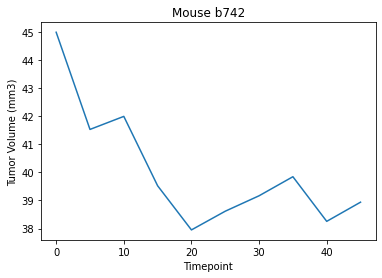

In [18]:
# Select a mouse that was treated with Capomulin  (Mouse b742 chosen from)
    # print(df[df['Drug Regimen'] == "Capomulin"])
        # Mouse b742 selected
# and generate a line plot of tumour volume vs. time point for that mouse.              
df[df['Drug Regimen'] == "Capomulin"]

b742_mouse = df.loc[df['Mouse ID'] == "b742", ['Timepoint', 'Tumor Volume (mm3)']]

plt.plot(b742_mouse['Timepoint'], b742_mouse['Tumor Volume (mm3)'])
plt.title("Mouse b742")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

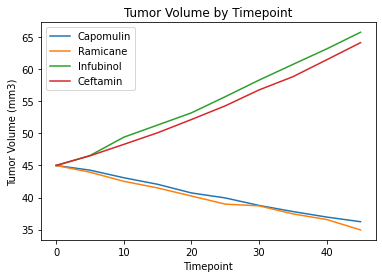

In [62]:
# Decided to plot the mean of Tumor Vol by Timepoint for the four drugs, to visualise a comparison
cap_df = df[df['Drug Regimen'] == "Capomulin"]
ram_df = df[df['Drug Regimen'] == "Ramicane"]
inf_df = df[df['Drug Regimen'] == "Infubinol"]
cef_df = df[df['Drug Regimen'] == "Ceftamin"]

plt.plot(cap_df.groupby('Timepoint')['Tumor Volume (mm3)'].mean(), label="Capomulin")
plt.plot(ram_df.groupby('Timepoint')['Tumor Volume (mm3)'].mean(), label="Ramicane")
plt.plot(inf_df.groupby('Timepoint')['Tumor Volume (mm3)'].mean(), label="Infubinol")
plt.plot(cef_df.groupby('Timepoint')['Tumor Volume (mm3)'].mean(), label="Ceftamin")
plt.legend()
plt.title("Tumor Volume by Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

Text(0, 0.5, 'average tumor volume')

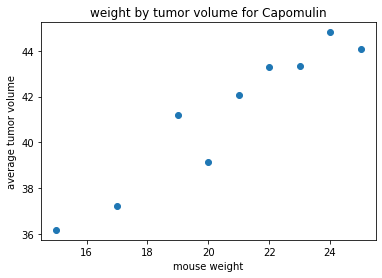

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_regimen = df[df['Drug Regimen'] == "Capomulin"].groupby('Weight (g)')['Tumor Volume (mm3)'].mean()

plt.scatter(capomulin_regimen.index, capomulin_regimen)
plt.title("weight by tumor volume for Capomulin")
plt.xlabel("mouse weight")
plt.ylabel("average tumor volume")

## Correlation and Regression

The correlation between both factors is 0.95


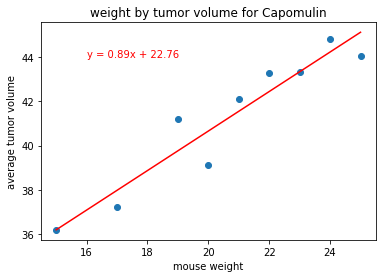

In [20]:
# Calculate the correlation coefficient and linear regression model
#  between mouse weight and average tumour volume for the Capomulin treatment.
correlation = st.pearsonr(capomulin_regimen.index, capomulin_regimen)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_regimen.index, capomulin_regimen)
regress_values = (capomulin_regimen.index * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression model on top of the previous scatter plot. 
plt.scatter(capomulin_regimen.index, capomulin_regimen)
plt.title("weight by tumor volume for Capomulin")
plt.xlabel("mouse weight")
plt.ylabel("average tumor volume")
plt.plot(capomulin_regimen.index,regress_values,"r-")
plt.annotate(line_eq,(16,44),fontsize=10,color="red")
plt.show()